In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
import pickle


%matplotlib inline

In [2]:
raw_data = pd.read_csv("fwww.csv")

In [3]:
raw_data.head(5)

,Unnamed: 0,Unnamed: 0.1,corners,event,fouls,game_date,game_id,goals,offsides,possession,red_cards,saves,shots,shots_on_goal,team,venue,yellow_cards
0,0,NaN,6.0,"2019 FIFA Women's World Cup, Group Stage",11.0,2019-06-19 19:00:00,529185,2.0,0.0,0.51,0.0,5.0,14.0,6.0,England,away,0.0
1,1,NaN,4.0,"2019 FIFA Women's World Cup, Group Stage",4.0,2019-06-19 19:00:00,529185,0.0,0.0,0.49,0.0,4.0,16.0,5.0,Japan,home,0.0
2,2,NaN,1.0,"2019 FIFA Women's World Cup, Group Stage",13.0,2019-06-19 19:00:00,529186,3.0,4.0,0.51,0.0,4.0,12.0,4.0,Argentina,away,1.0
3,3,NaN,5.0,"2019 FIFA Women's World Cup, Group Stage",15.0,2019-06-19 19:00:00,529186,3.0,0.0,0.49,0.0,2.0,12.0,7.0,Scotland,home,3.0
4,0,0.0,NaN,Women's International Friendly,NaN,2008-06-19 07:00:00,241579,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Italy,away,NaN


In [4]:
raw_data.isna().sum()

Unnamed: 0         0
Unnamed: 0.1       4
corners          276
event              0
fouls            276
game_date          0
game_id            0
goals              2
offsides         276
possession       276
red_cards        276
saves            276
shots            276
shots_on_goal    276
team               0
venue              0
yellow_cards     276
dtype: int64

In [226]:
drop_teams=["Bolivia","Cuba","Czech Republic Women","Great Britain Women","Panama","Vietnam Women"]

for teams in drop_teams:
    data=data[data.team != teams]

In [227]:
columns_w_null=["goals","fouls","yellow_cards","red_cards","offsides","corners","saves","possession","shots",
                "shots_on_goal"]
for column in columns_w_null:
    data[column] = data.groupby("team")[column].transform(lambda x: x.fillna(x.median()))

In [228]:
data.isna().sum()

Unnamed: 0              0
game_date               0
game_id                 0
event                   0
team                    0
venue                   0
goals                   0
fouls                   0
yellow_cards            0
red_cards               0
offsides                0
corners                 0
saves                   0
possession              0
shots                   0
shots_on_goal           0
on_target_percent       0
finishes_per_attempt    0
finished_per_target     0
dtype: int64

In [5]:
def clean_data(df):
    
    drop_teams=["Bolivia","Cuba","Czech Republic Women","Great Britain Women","Panama","Vietnam Women"]

    for teams in drop_teams:
        df=df[df.team != teams]
        
    columns_w_null=["goals","fouls","yellow_cards","red_cards","offsides","corners","saves","possession","shots",
                "shots_on_goal"]
    
    for column in columns_w_null:
        df[column] = df.groupby("team")[column].transform(lambda x: x.fillna(x.median()))
     
    df["on_target_percent"]=df["shots_on_goal"]/df["shots"]
    
    df["finishes_per_attempt"]=df["goals"]/df["shots"]
    df["finished_per_target"]=df["goals"]/df["shots_on_goal"]
        
    df.replace([np.inf, -np.inf], float(0.00),inplace=True)
    df.fillna(float(0.00),inplace=True)
    
    return df


In [6]:
data=clean_data(raw_data)

In [10]:
data.drop("Unnamed: 0",axis=1,inplace=True)

In [11]:
data.describe()

,corners,fouls,game_id,goals,offsides,possession,red_cards,saves,shots,shots_on_goal,yellow_cards,on_target_percent,finishes_per_attempt,finished_per_target
count,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000
mean,4.462715,9.667304,452489.201721,1.501912,2.193595,0.491530,0.017208,2.950765,11.791109,4.280115,0.860899,0.368737,0.144106,0.344702
std,3.194874,4.007436,80665.494980,1.714977,1.719310,0.136001,0.128258,2.216557,6.995118,3.006361,0.958473,0.187221,0.205399,0.419354
min,0.000000,0.000000,241579.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,7.000000,420058.000000,0.000000,1.000000,0.430000,0.000000,2.000000,7.000000,2.000000,0.000000,0.272727,0.000000,0.000000
50%,4.000000,10.000000,477661.000000,1.000000,2.000000,0.490000,0.000000,3.000000,11.000000,4.000000,1.000000,0.333333,0.095238,0.272727
75%,6.000000,12.000000,527395.000000,2.000000,3.000000,0.560000,0.000000,4.000000,15.750000,6.000000,1.000000,0.437500,0.200000,0.500000
max,19.000000,29.000000,540313.000000,13.000000,11.000000,1.000000,1.000000,14.000000,40.000000,21.000000,6.000000,1.000000,2.333333,7.000000


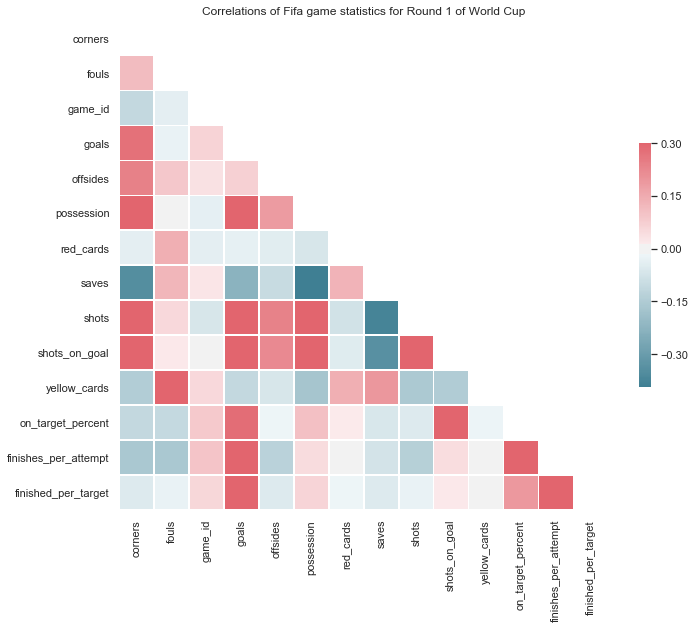

In [13]:
#graph correlations
sns.set(style="white")

d=data

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlations of Fifa game statistics for Round 1 of World Cup" )
plt.savefig("Round_1_Correlation_graph.png")

In [14]:
fwww=data[data["event"].str.contains("2019 FIFA Women's World Cup")]

In [15]:
fwww.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 0 to 931
Data columns (total 18 columns):
corners                 64 non-null float64
event                   64 non-null object
fouls                   64 non-null float64
game_date               64 non-null object
game_id                 64 non-null int64
goals                   64 non-null float64
offsides                64 non-null float64
possession              64 non-null float64
red_cards               64 non-null float64
saves                   64 non-null float64
shots                   64 non-null float64
shots_on_goal           64 non-null float64
team                    64 non-null object
venue                   64 non-null object
yellow_cards            64 non-null float64
on_target_percent       64 non-null float64
finishes_per_attempt    64 non-null float64
finished_per_target     64 non-null float64
dtypes: float64(13), int64(1), object(4)
memory usage: 9.5+ KB


In [16]:
percents=('possession',
 'on_target_percent',
 'finishes_per_attempt',
 'finished_per_target')

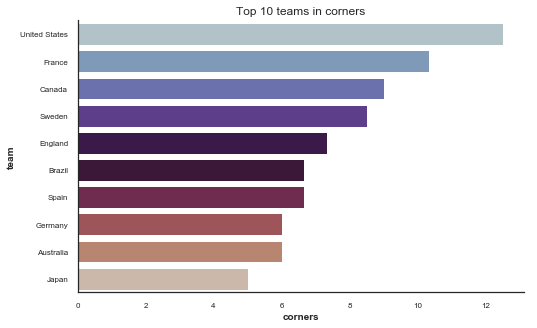

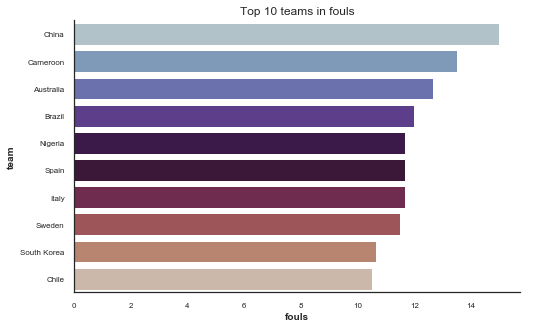

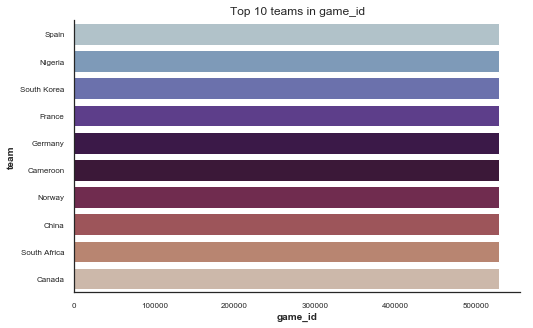

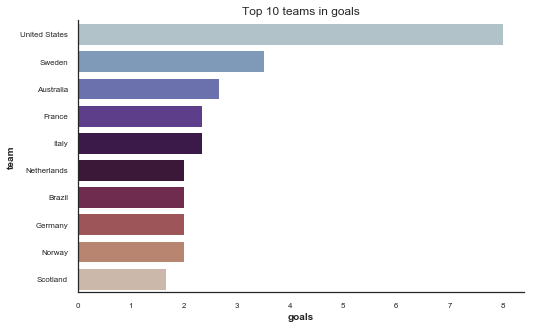

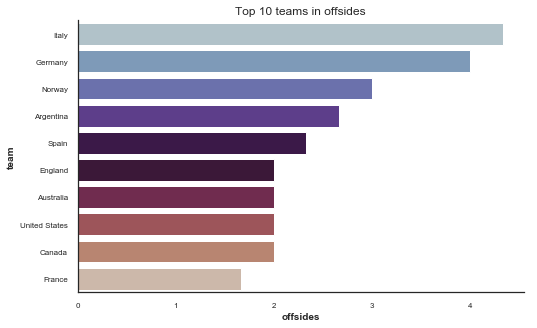

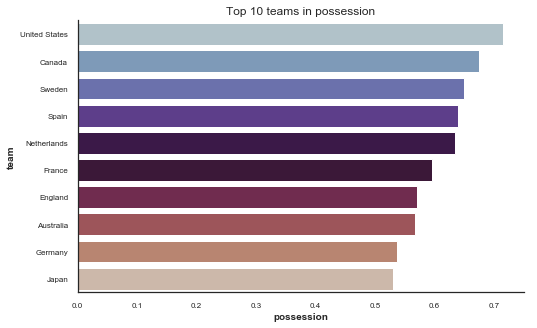

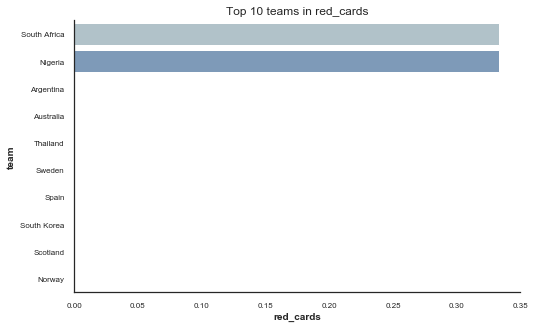

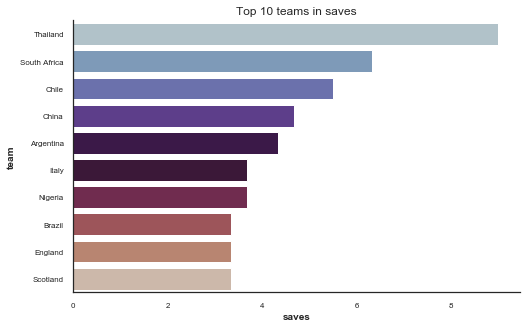

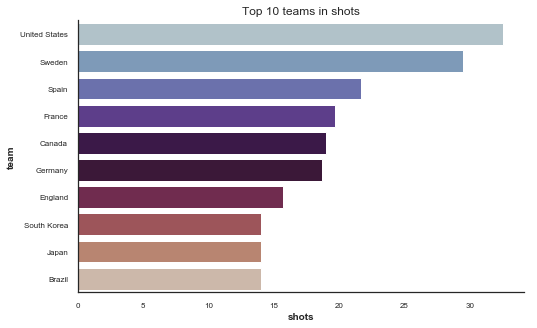

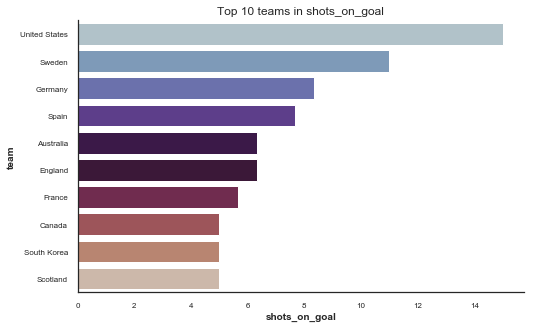

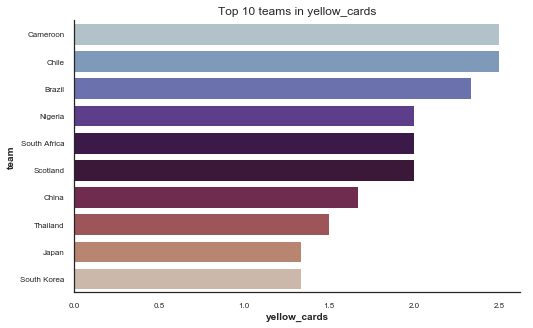

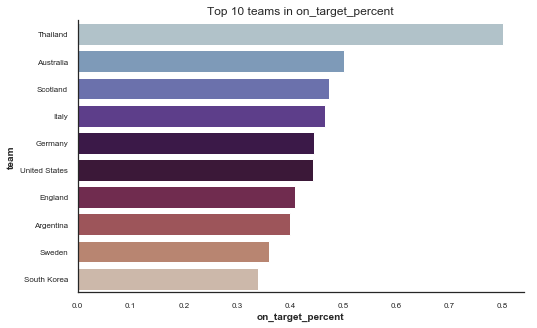

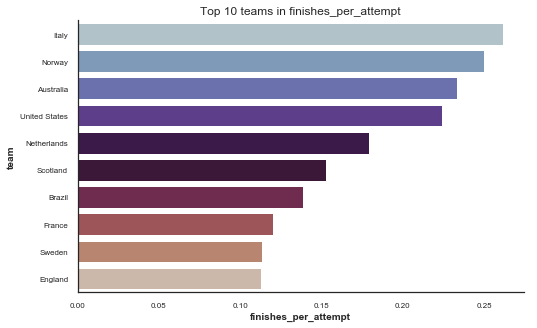

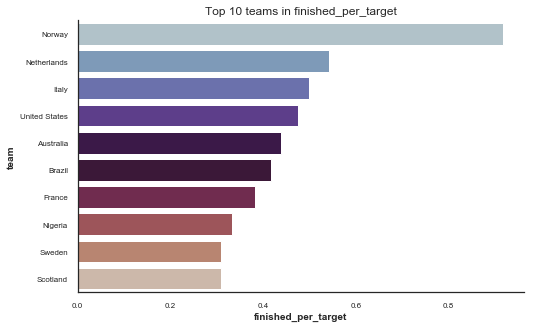

In [18]:
for variable in fwww.groupby("team").mean():
    f, ax = plt.subplots(figsize=(8, 5))
    plt.rcParams['font.size'] = 10
    plt.rcParams['axes.labelsize'] = 10
    plt.rcParams['axes.labelweight'] = 'bold'
    plt.rcParams['xtick.labelsize'] = 8
    plt.rcParams['ytick.labelsize'] = 8
    plt.rcParams['figure.titlesize'] = 10
    sns.barplot(fwww.groupby("team").mean().sort_values(variable,axis=0,ascending=False)[variable][:10],
                fwww.groupby("team").mean().sort_values(variable,axis=0,ascending=False).index[:10], data=fwww.groupby("team").mean(),
                palette="twilight")
    sns.despine()
    plt.title("Top 10 teams in " + variable)
    plt.savefig("Top_10_in_" + variable+".png")
    plt.show()

# Modeling


In [19]:
features=data[['team','possession',
                    'on_target_percent',
                    'finishes_per_attempt',
                    'finished_per_target','corners']]
features=pd.get_dummies(features)

In [20]:
forest = RandomForestRegressor(n_estimators=100, max_depth= 5)
forest.fit(features, data["goals"])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [23]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(features,data["goals"],test_size=0.3,random_state=62)

In [25]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   33.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.3min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [26]:
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [30]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = RandomForestRegressor(n_estimators = 10)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


Model Performance
Average Error: 0.3328 degrees.
Accuracy = 76.73%.
Model Performance
Average Error: 0.3182 degrees.
Accuracy = 77.80%.
Improvement of 1.39%.


In [32]:
final_model=best_random

filename = 'finalized_model.sav'
pickle.dump(final_model, open(filename, 'wb'))

# Predicting Scores

In [64]:
ewm=data.sort_values("game_date").groupby('team').apply(lambda x: x.ewm(2).mean())

In [65]:
average_ewm=ewm.groupby("team").mean()

In [66]:
average_df=data.groupby("team").mean()

In [67]:
average_df

,corners,fouls,game_id,goals,offsides,possession,red_cards,saves,shots,shots_on_goal,yellow_cards,on_target_percent,finishes_per_attempt,finished_per_target
team,,,,,,,,,,,,,,
Argentina,0.653846,9.500000,442604.307692,1.153846,2.153846,0.460769,0.000000,3.653846,8.346154,3.153846,1.500000,0.381523,0.119910,0.321429
Australia,4.979167,10.208333,462074.979167,2.270833,2.083333,0.514375,0.020833,3.208333,13.458333,5.020833,1.041667,0.377786,0.177804,0.451406
Austria,3.222222,11.111111,500045.888889,0.444444,2.777778,0.355556,0.000000,4.555556,7.444444,2.222222,0.555556,0.303792,0.056437,0.120370
Belgium,2.500000,10.666667,500234.666667,0.833333,1.833333,0.423333,0.000000,2.666667,5.333333,1.666667,0.833333,0.382606,0.280093,0.472222
Brazil,4.637681,10.217391,440175.681159,1.913043,1.956522,0.540580,0.000000,2.391304,13.753623,4.797101,1.289855,0.366559,0.172064,0.450311
Cameroon,4.500000,15.000000,438887.000000,1.000000,2.500000,0.418636,0.000000,2.181818,13.500000,4.045455,1.681818,0.304812,0.052726,0.186147
Canada,3.929825,10.192982,432909.438596,1.508772,1.964912,0.479123,0.017544,2.122807,9.631579,3.368421,0.982456,0.343651,0.164366,0.469862
Catalunya Women,4.000000,9.000000,537147.000000,0.000000,5.000000,0.510000,0.000000,1.000000,10.000000,4.000000,0.000000,0.400000,0.000000,0.000000
Chile,1.315789,8.447368,525019.631579,0.526316,1.710526,0.355263,0.000000,5.078947,4.894737,1.710526,1.394737,0.357029,0.108536,0.188596


In [68]:
average_ewm

,corners,fouls,game_id,goals,offsides,possession,red_cards,saves,shots,shots_on_goal,yellow_cards,on_target_percent,finishes_per_attempt,finished_per_target
team,,,,,,,,,,,,,,
Argentina,0.620336,9.408771,407117.316562,1.041897,2.051547,0.458774,0.000000,3.561877,8.381184,3.123540,1.520454,0.371981,0.113488,0.305136
Australia,4.931526,10.066404,453696.328179,2.208150,2.043520,0.513346,0.020836,3.229735,13.459599,4.947812,1.034631,0.371480,0.171808,0.441032
Austria,3.772463,11.047666,490917.090406,0.626021,2.408588,0.347938,0.000000,4.636844,7.482696,2.378745,0.449145,0.315210,0.075870,0.166248
Belgium,2.181904,8.992210,491323.012891,0.896292,1.513072,0.436192,0.000000,2.372098,5.023527,1.731750,0.852612,0.503446,0.399951,0.546283
Brazil,4.592554,10.132908,432119.730369,1.894237,1.947878,0.541087,0.000000,2.350468,13.746302,4.788020,1.256389,0.366087,0.170664,0.445966
Cameroon,4.683980,15.102029,413205.835962,1.011101,2.649749,0.427276,0.000000,2.106240,14.374477,4.326091,1.566620,0.301091,0.050645,0.164851
Canada,3.843646,10.232504,423259.520408,1.501759,1.955071,0.474015,0.017543,2.172283,9.391514,3.311045,1.012120,0.344319,0.166309,0.474858
Catalunya Women,4.000000,9.000000,537147.000000,0.000000,5.000000,0.510000,0.000000,1.000000,10.000000,4.000000,0.000000,0.400000,0.000000,0.000000
Chile,1.231766,7.873062,521518.961337,0.516911,1.735163,0.341277,0.000000,5.236340,4.673214,1.744441,1.271124,0.387887,0.110877,0.186695


In [86]:
predicting_feat=average_ewm[['possession',
                    'on_target_percent',
                    'finishes_per_attempt',
                    'finished_per_target','corners']]
predicting_feat.reset_index(level=0, inplace=True)
predicting_feat=pd.get_dummies(predicting_feat)
predictions=np.round(final_model.predict(predicting_feat),0)
predictions

array([1., 3., 1., 2., 3., 1., 2., 0., 1., 2., 1., 1., 1., 1., 1., 1., 1.,
       1., 2., 2., 0., 0., 2., 1., 2., 1., 1., 2., 0., 1., 3., 1., 1., 1.,
       2., 1., 1., 4., 1., 1., 1., 1., 1., 2., 1., 1., 2., 3., 1., 1., 2.])

In [87]:
predictions=pd.DataFrame(zip(average_df.index,predictions),columns=["team","predictions"])
predictions.head(5)

,team,predictions
0,Argentina,1.0
1,Australia,3.0
2,Austria,1.0
3,Belgium,2.0
4,Brazil,3.0


In [88]:
round_2=[["China","Spain"],["South Africa","Germany"],["Nigeria","France"],["South Korea","Norway"],
         ["Jamaica","Australia"],["Italy","Brazil"],["Japan","England"],["Scotland","Argentina"],
         ["Cameroon","New Zealand"],["Netherlands","Canada"],["Sweden","United States"],["Thailand","Chile"]]
round_2=pd.DataFrame(round_2,columns=["home","away"])

In [89]:
round_2=pd.merge(round_2, predictions,  how='left', left_on=["home"], 
         right_on = ['team']).drop("team",axis=1)
round_2=pd.merge(round_2, predictions,  how='left', left_on=["away"], 
         right_on = ['team']).drop("team",axis=1)

In [90]:
round_2

,home,away,predictions_x,predictions_y
0,China,Spain,2.0,1.0
1,South Africa,Germany,1.0,2.0
2,Nigeria,France,1.0,2.0
3,South Korea,Norway,1.0,2.0
4,Jamaica,Australia,1.0,3.0
5,Italy,Brazil,2.0,3.0
6,Japan,England,2.0,1.0
7,Scotland,Argentina,1.0,1.0
8,Cameroon,New Zealand,1.0,1.0
9,Netherlands,Canada,3.0,2.0


In [91]:
def predictor(df):
    round_2["winner"] = ""
    round_2.columns = ["home","away","home_goals","away_goals","winner"]
    
    for index,row in df.iterrows():
        if row["home_goals"] > row["away_goals"]:
            df["winner"][index] = df["home"][index]
        elif row["home_goals"] < row["away_goals"]:
            df["winner"][index] = df["away"][index]
        else:
            df["winner"][index] = "Tie"
        print(df["winner"][index]+" ("+df["home"][index]+" "+str(df["home_goals"][index])+" : "+str(df["away_goals"][index])+" "+df["away"][index]+")")
    return df

In [92]:
predictor(round_2)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


China (China 2.0 : 1.0 Spain)
Germany (South Africa 1.0 : 2.0 Germany)
France (Nigeria 1.0 : 2.0 France)
Norway (South Korea 1.0 : 2.0 Norway)
Australia (Jamaica 1.0 : 3.0 Australia)
Brazil (Italy 2.0 : 3.0 Brazil)
Japan (Japan 2.0 : 1.0 England)
Tie (Scotland 1.0 : 1.0 Argentina)
Tie (Cameroon 1.0 : 1.0 New Zealand)
Netherlands (Netherlands 3.0 : 2.0 Canada)
United States (Sweden 2.0 : 3.0 United States)
Tie (Thailand 1.0 : 1.0 Chile)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,home,away,home_goals,away_goals,winner
0,China,Spain,2.0,1.0,China
1,South Africa,Germany,1.0,2.0,Germany
2,Nigeria,France,1.0,2.0,France
3,South Korea,Norway,1.0,2.0,Norway
4,Jamaica,Australia,1.0,3.0,Australia
5,Italy,Brazil,2.0,3.0,Brazil
6,Japan,England,2.0,1.0,Japan
7,Scotland,Argentina,1.0,1.0,Tie
8,Cameroon,New Zealand,1.0,1.0,Tie
9,Netherlands,Canada,3.0,2.0,Netherlands
